In [4]:
# 输入数据的参数
_TRAINSET1='{"name":"trainset1","type":0,"uri":"tmp_f3e3796135a8457e90f87536d759881b"}'
_TRAINSET2='{"name":"trainset2","type":0,"uri":"tmp_a90dbcba9ae14afaa171ed071cd126ea"}'
_TESTSETA='{"name":"testsetA","type":0,"uri":"tmp_c4e991086e684bddafeaac9de2666e07"}'
_TESTSETB='{"name":"testsetB","type":0,"uri":"tmp_03d402d824cf42e582b6646f7db46700"}'

# 输出数据的参数
_OUTPUT='[{"name":"output1","type":0,"uri":"tmp_3a454c7ce17b4969bf657015fbd42c27"},{"name":"output2","type":0,"uri":"tmp_b43a1a3625514c29a85eccf5be2221c9"},{"name":"output3","type":0,"uri":"tmp_8aec5cc93c7e485c9b40422e05d0bbb6"},{"name":"output4","type":0,"uri":"tmp_f4f33d1f1aa84a5cb56b964d672655e0"}]'

# 自定义参数


## WHY DL

[Jeremy Howrad对现有表格数据处理方法的评价](https://github.com/pinchenjohnny/wuhu-intelli-city-comp/blob/master/quote.png)

（1）省去大量手动特征分析与提取。

（2）泛化能力强，更好应对噪音、新情况的出现，减少维护成本。

（3）实现非常简单，遵循深度学习这一类的处理方法，学习按比收益。

（4）模型最低点一般较高，再差也往往比其他方法好。

[DL处理表格数据原理](https://github.com/pinchenjohnny/wuhu-intelli-city-comp/blob/master/DL_process_tabular_essence.png)

表格也是一种多维数据，拟合、计算的背后是矩阵乘，类似用DL作图像处理（CV）。

[fastai tutorial](https://docs.fast.ai/tabular.html)

## 安装环境

conda安装失败且慢，用pip

In [41]:
# conda install 安装fastai的包很慢，用pip
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/pytorch/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/menpo/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/bioconda/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/msys2/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
# !conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge
# !conda config --set show_channel_urls yes

# !conda install pytorch torchvision cudatoolkit -y
# !conda install -c pytorch -c fastai fastai -y
# print('installation ends')

In [ ]:
# install fastai
!pip install fastai
print('installation ends')

## 准备工作

In [5]:
import wfio
import pandas as pd
from pandas.core.frame import DataFrame

# preprocess
import time
import datetime

from fastai import *
from fastai.tabular import *

from ustciscrBDL_B import get_score

import matplotlib.pyplot as plt
import random

trainset1 = wfio.read_dataframe(_TRAINSET1)
trainset2 = wfio.read_dataframe(_TRAINSET2)
testseta = wfio.read_dataframe(_TESTSETA)
testseta['yc'] = 0
testsetb = wfio.read_dataframe(_TESTSETB)
testsetb['yc'] = 0

for df in [trainset1, trainset2, testseta, testsetb]:
    print(len(df))

10000
10000
6000
6000


## 合并trainset1, trainset2 到 trainset

trainset1,2 属性总数，有哪些属性，不同的属性

In [45]:
print('---trainset1---')
print(trainset1.columns.size)
for attr in list(trainset1.columns):
    print(attr, end=', ')
print()
    
print('---trainset2---')
print(trainset2.columns.size)
for attr in list(trainset2.columns):
    print(attr, end=', ')
print()

col1 = list(trainset1.columns)
col2 = list(trainset2.columns)
print('col1\t\t\tcol2')
for i in range(114):
    if col1[i] != col2[i]:
        print(f'{col1[i]}\t{col2[i]}')

---trainset1---
114
2017q1fphdsl, 2017q1jxje, 2017q1jxsl, 2017q1kpje, 2017q1kps, 2017q1kpse, 2017q1kpsl, 2017q1rkse, 2017q2fphdsl, 2017q2jxje, 2017q2jxsl, 2017q2kpje, 2017q2kps, 2017q2kpse, 2017q2kpsl, 2017q2rkse, 2017q3fphdsl, 2017q3jxje, 2017q3jxsl, 2017q3kpje, 2017q3kps, 2017q3kpse, 2017q3kpsl, 2017q3rkse, 2017q4fphdsl, 2017q4jxje, 2017q4jxsl, 2017q4kpje, 2017q4kps, 2017q4kpse, 2017q4kpsl, 2017q4rkse, 2018q1fphdsl, 2018q1jxje, 2018q1jxsl, 2018q1kpje, 2018q1kps, 2018q1kpse, 2018q1kpsl, 2018q1rkse, 2018q2fphdsl, 2018q2jxje, 2018q2jxsl, 2018q2kpje, 2018q2kps, 2018q2kpse, 2018q2kpsl, 2018q2rkse, 2018q3fphdsl, 2018q3jxje, 2018q3jxsl, 2018q3kpje, 2018q3kps, 2018q3kpse, 2018q3kpsl, 2018q3rkse, 2018q4fphdsl, 2018q4jxje, 2018q4jxsl, 2018q4kpje, 2018q4kps, 2018q4kpse, 2018q4kpsl, 2018q4rkse, 2019q1fphdsl, 2019q1jxje, 2019q1jxsl, 2019q1kpje, 2019q1kps, 2019q1kpse, 2019q1kpsl, 2019q1rkse, 2019q2fphdsl, 2019q2jxje, 2019q2jxsl, 2019q2kpje, 2019q2kps, 2019q2kpse, 2019q2kpsl, 2019q2rkse, 2019q3fphd

trainset1一个实例

In [46]:
trainset1.iloc[0, -1-18:-1]

2019q4rkse                               50.73
cwrysjh       f239ac1d2808e5112c4c0559d383ca5a
cwryxm                                     袁秀珍
cyrs                                        15
djkyrq                     2018-08-20 00:00:00
fddbrxm                                    杨宠怀
frsjh         54eba6f646d394796b1773da7e8b56f4
jdxz                            芜湖市镜湖区滨江公共服务中心
jyfw                                税务代理、咨询服务。
nsrmc                         芜湖市快讯务师事务所有限责任公司
scjydz               芜湖市镜湖区文化路39-2号海螺商务楼北楼4-5层
xy                                  会计、审计及税务服务
xydl                                     商务服务业
xyml                                  租赁和商务服务业
xyzl                                     咨询与调查
yc                                           1
zcdz                 芜湖市镜湖区文化路39-2号海螺商务楼北楼4-5层
zczby                                   300000
Name: 0, dtype: object

trainset2一个实例

In [47]:
trainset2.iloc[0, -1-18:-1]

2019q4rkse                                                     
bsrxm                                                        田捷
bsrxmmp                        0ae1c93e676509d2c32b2a2a926c9553
cyrs                                                        4.0
djrq                                                   2017-3-2
fdbrxmp                        6501eab4ce96004c87a85e3f5b9ca641
fddbrxm                                                      田捷
hy                                                          广告业
hydl                                                      商务服务业
hyml                                                   租赁和商务服务业
hyzl                                                        广告业
jyfw          广告设计、制作、代理及发布，文化艺术交流服务，企业管理咨询，商务信息咨询，会展庆典礼仪服务，...
nsrmc                                           芜湖市时空盒数字方广告有限公司
scjydz                                      芜湖市镜湖区利达新村15#楼11号门面
xzjd                                             芜湖市镜湖区汀棠公共服务中心
yc                                      

（1）trainset1, 2 前96个税务属性一致

> 年份季度前缀，如2017q1<br>
> 发票核定数量fphdsl，<br>
> 进项金额jxje，进项税率jxsl，<br>
> 开票金额kpje，开票数kps，开票税额kpse，开票税率kpsl，<br>
> 入库金额rkse<br>
> 所以，每季度8个属性，2017~2019三年共12季度，12*8=96个属性<br>

（2）后18个企业属性

trainset1|trainset2
-|-
财务人员手机号cwrysjh, 财务人员姓名cwryxm,<br>从业人数cyrs, 登记开业日期djkyrq,<br>法定代表人姓名fddbrxm, 法人手机号frsjh,<br>街道乡镇jdxz,<br>经营范围jyfw,<br>纳税人名称nsrmc,<br>生产经营地址scjydz,<br>行（xing）业xy, 行业大类xydl, 行业门类xyml, 行业中类xyzl,<br>异常yc,<br>注册地址zcdz, 注册成本（元）zczby,<br>主键:纳税人识别号zjnsrsbh | 报税人姓名bsrxm, 报税人姓名？？（手机号加密值）bsrxmmp, <br>从业人数（float）cyrs, 登记日期（2017-3-2）djrq, <br>法定代表人姓名？（手机号加密值）fdbrxmp, 法定代表人姓名fddbrxm,<br>行业hy, 行业大类hydl, 行业门类hyml, 行业中类hyzl, 经营范围jyfw,<br>纳税人名称nsrmc, <br>生产经营地址scjydz, 乡镇街道xzjd, <br>异常yc, <br>注册地址zcdz, 注册资本zczb, 主键:纳税人识别号zjnsrsbh,

**合并trainset1,2到trainset**

以testset属性定义trainset属性，testset属性与trainset2是一致的

In [48]:
test_attr_n = test.columns.size
print(test_attr_n)
for i in range(test_attr_n):
    print(testset.columns[i], end=', ')

#  train2: bsrxm, bsrxmmp, cyrs, djrq, fdbrxmp, fddbrxm, hy, hydl, hyml, hyzl, jyfw, nsrmc, scjydz, xzjd, yc, zcdz, zczb, zjnsrsbh,

113
2017q1fphdsl, 2017q1jxje, 2017q1jxsl, 2017q1kpje, 2017q1kps, 2017q1kpse, 2017q1kpsl, 2017q1rkse, 2017q2fphdsl, 2017q2jxje, 2017q2jxsl, 2017q2kpje, 2017q2kps, 2017q2kpse, 2017q2kpsl, 2017q2rkse, 2017q3fphdsl, 2017q3jxje, 2017q3jxsl, 2017q3kpje, 2017q3kps, 2017q3kpse, 2017q3kpsl, 2017q3rkse, 2017q4fphdsl, 2017q4jxje, 2017q4jxsl, 2017q4kpje, 2017q4kps, 2017q4kpse, 2017q4kpsl, 2017q4rkse, 2018q1fphdsl, 2018q1jxje, 2018q1jxsl, 2018q1kpje, 2018q1kps, 2018q1kpse, 2018q1kpsl, 2018q1rkse, 2018q2fphdsl, 2018q2jxje, 2018q2jxsl, 2018q2kpje, 2018q2kps, 2018q2kpse, 2018q2kpsl, 2018q2rkse, 2018q3fphdsl, 2018q3jxje, 2018q3jxsl, 2018q3kpje, 2018q3kps, 2018q3kpse, 2018q3kpsl, 2018q3rkse, 2018q4fphdsl, 2018q4jxje, 2018q4jxsl, 2018q4kpje, 2018q4kps, 2018q4kpse, 2018q4kpsl, 2018q4rkse, 2019q1fphdsl, 2019q1jxje, 2019q1jxsl, 2019q1kpje, 2019q1kps, 2019q1kpse, 2019q1kpsl, 2019q1rkse, 2019q2fphdsl, 2019q2jxje, 2019q2jxsl, 2019q2kpje, 2019q2kps, 2019q2kpse, 2019q2kpsl, 2019q2rkse, 2019q3fphdsl, 2019q3jxje, 

In [6]:
trainset = pd.DataFrame()
# 前96个税务属性直接拼接
for i in range(96):
    attr = str(trainset2.columns[i])
    trainset[attr] = pd.concat([trainset1[attr], trainset2[attr]])

# 后18个企业属性
t1_attrs = ['cwryxm','cwrysjh',
'cyrs', 'djkyrq',
'frsjh', 'fddbrxm',
'xy', 'xydl', 'xyml', 'xyzl', 'jyfw',
'nsrmc',
'scjydz', 'jdxz',
'yc', 
'zcdz', 'zczby', 'zjnsrsbh'
]
for i in range(96,114):
    t1_attr = t1_attrs[i-96]
    attr = str(trainset2.columns[i])
    trainset[attr] = pd.concat([trainset1[t1_attr], trainset2[attr]])

print(trainset.columns.size)
print(trainset.columns[-1-18:-1])

114
Index(['2019q4rkse', 'bsrxm', 'bsrxmmp', 'cyrs', 'djrq', 'fdbrxmp', 'fddbrxm',
       'hy', 'hydl', 'hyml', 'hyzl', 'jyfw', 'nsrmc', 'scjydz', 'xzjd', 'yc',
       'zcdz', 'zczb'],
      dtype='object')


## 合并后trainset 属性

（1）前96个税务属性<br>
> 年份季度前缀，如2017q1<br>
> 发票核定数量fphdsl，<br>
> 进项金额jxje，进项税率jxsl，<br>
> 开票金额kpje，开票数kps，开票税额kpse，开票税率kpsl，<br>
> 入库金额rkse<br>

（2）剩下18个企业属性<br>
> 报税人姓名bsrxm, 报税人姓名？？（手机号加密值）bsrxmmp, <br>
> 从业人数（int, float）cyrs, <br>
> 登记日期（2018-08-20 00:00:00，2017-3-2）djrq, <br>
> 法定代表人姓名？（手机号加密值）fdbrxmp, 法定代表人姓名fddbrxm,<br>
> 行业hy, 行业大类hydl, 行业门类hyml, 行业中类hyzl, 经营范围jyfw,<br>
> 纳税人名称nsrmc, <br>
> 生产经营地址scjydz, 乡镇街道xzjd, <br>
> 异常yc, <br>
> 注册地址zcdz, 注册资本zczb, <br>
> 主键:纳税人识别号zjnsrsbh

## 登记日期 转为距今（2019-12-32）多少

In [7]:
def transform_attr_djrq(df):
    for index, row in df.iterrows():
        start = str(row['djrq'])
        end = '2019-12-31 00:00:00'
        try:
            start=time.strptime(start, "%Y-%m-%d %H:%M:%S")
        except ValueError:
            start=time.strptime(start, "%Y-%m-%d")
        end=time.strptime(end, "%Y-%m-%d %H:%M:%S")
        userStart=datetime.datetime(start[0],start[1],start[2])
        userEnd=datetime.datetime(end[0],end[1],end[2])
        res = (userEnd-userStart).days
        row['djrq'] = res

datasets = [trainset, testseta, testsetb]
for dataset in datasets:
    transform_attr_djrq(dataset)

## 增加属性：开票比例、进项税额、应纳税额、欠税

In [8]:
def add_tax_attrs(df):
    kpbl=[]; jxse=[]; ynse=[]; qs=[]
    for i in range(12):
        kpbl.append([]); jxse.append([]); ynse.append([]); qs.append([])

    for index, row in df.iterrows():
        for yn in range(3):
            for sn in range(4):
                prefix = str(2017+yn)+'q'+str(sn+1)
                i = yn*4+sn # 12季度中的第几季度(从0开始)
                attr_names = []
                for attr_body in ['kps', 'fphdsl',
                    'jxje', 'jxsl',
                    'kpse',
                    'rkse'
                ]: attr_names.append(prefix+attr_body)
                
                try: kps=float(row[attr_names[0]]);
                except: kps=0
                try: fphdsl=float(row[attr_names[1]])
                except: fphdsl=0
                try: jxje=float(row[attr_names[2]])
                except: jxje=0
                try: jxsl=float(row[attr_names[3]])
                except: jxsl=0
                try: kpse=float(row[attr_names[4]])
                except: kpse=0
                try: rkse=float(row[attr_names[5]])
                except: rkse=0
                

                # 开票数
                if fphdsl>0: kpbl[i].append(kps/fphdsl)
                else: kpbl[i].append(kps)
                # 进项税额
                tmp_jxse = jxje * jxsl
                jxse[i].append(tmp_jxse)
                # 应纳税额
                tmp_ynse = kpse - tmp_jxse * (jxsl >= 0.03)
                ynse[i].append(tmp_ynse)
                # 欠税
                tmp_qs = tmp_ynse - rkse
                if tmp_qs>0: qs[i].append(tmp_qs)
                else: qs[i].append(0)

    # 走完所有row
    for yn in range(3):
            for sn in range(4):
                prefix = str(2017+yn)+'q'+str(sn+1)
                i = yn*4+sn # 12季度中的第几季度(从0开始)
                attr_names = []
                for attr_body in ['kpbl', 'jxse', 'ynse', 'qs']:
                    attr_names.append(prefix+attr_body)
                df[attr_names[0]] = kpbl[i]
                df[attr_names[1]] = jxse[i]
                df[attr_names[2]] = ynse[i]
                df[attr_names[3]] = qs[i]

for dset in datasets:
    add_tax_attrs(dset)

## 综上，trainset中的属性

## 修正列类型

In [9]:
# 修正列类型
def correct_dtypes(df):
    cols = df.columns
    # 前8*12=96个税务属性
    for i in range(96):
        attr = cols[i]
        df[attr] = pd.to_numeric(df[attr], errors='coerce').fillna(0)
    # 尾4*12=48个税务属性
    for i in range(114,114+48):
        attr = cols[i]
        df[attr] = pd.to_numeric(df[attr], errors='coerce').fillna(0)
    # 企业属性和异常属性
    for attr in ['cyrs', 'djrq', 'yc', 'zczb']:
        df[attr] = pd.to_numeric(df[attr], errors='coerce').fillna(0)

# 查看各列属性
def show_dtypes(df):
    cols = df.columns
    print('--------check column dtype-----------')
    print('--------first 96 tax attrs--------')
    print('take one season (8 attrs) to represent')
    for i in range(8):
        print(cols[i], end='\t')
        print(trainset[cols[i]].dtype)
    print('-----------mid 14 company attrs-----------')
    for i in range(100, 114):
        print(cols[i], end='\t')
        print(trainset[cols[i]].dtype)
    print('-----------last 48 tax attrs-----------')
    print('take one season (4 attrs) to represent')
    for i in range(114,114+4):
        print(cols[i], end='\t')
        print(trainset[cols[i]].dtype)

correct_dtypes(trainset)
show_dtypes(trainset)
correct_dtypes(testseta)
correct_dtypes(testsetb)

--------check column dtype-----------
--------first 96 tax attrs--------
take one season (8 attrs) to represent
2017q1fphdsl	int64
2017q1jxje	float64
2017q1jxsl	float64
2017q1kpje	float64
2017q1kps	int64
2017q1kpse	float64
2017q1kpsl	float64
2017q1rkse	float64
-----------mid 14 company attrs-----------
fdbrxmp	object
fddbrxm	object
hy	object
hydl	object
hyml	object
hyzl	object
jyfw	object
nsrmc	object
scjydz	object
xzjd	object
yc	int64
zcdz	object
zczb	float64
zjnsrsbh	object
-----------last 48 tax attrs-----------
take one season (4 attrs) to represent
2017q1kpbl	float64
2017q1jxse	float64
2017q1ynse	float64
2017q1qs	float64


## 模型训练

In [10]:
!mkdir model
!ls

model


## model1 144+14个属性全用上

In [11]:
# 缺失值，分类值，连续值的处理方法
procs = [FillMissing, Categorify, Normalize]

# 分类值categorical
cat_names1 = [
    'bsrxm', 'bsrxmmp',
    'fdbrxmp', 'fddbrxm',
    'hy', 'hydl', 'hyml', 'hyzl', 
    'nsrmc', 
    'zjnsrsbh'
]

# 连续值continous
cont_names1 = [
    'cyrs',
    'djrq',
    'zczb',
]
for yn in range(3): # year num
    for sn in range(4): # seasom num
        prefix = str(2017+yn)+'q'+str(sn+1)
        for attr in [
            'kps', 'fphdsl', 'kpbl',
            'jxje', 'jxsl', 'jxse',
            'kpje', 'kpsl', 'kpse',
            'ynse', 'rkse',  'qs'
        ]:
            attr = prefix + attr
            cont_names1.append(attr)
            
# 因变量
dep_var = 'yc'

## 划分验证集

In [106]:
# 数据集异常占比
def stat_yc(df):
    ones = 0
    zeros = 0
    for index, row in df.iterrows():
        if row['yc'] == 1:
            ones += 1
        elif row['yc'] == 0:
            zeros += 1
    print(f'异常占比 {ones/(ones+zeros)}')
    print(f'{zeros} + {ones} = {zeros+ones}')

# 全集异常比
print('全集 ', end='')
stat_yc(trainset)

# 划分法一：随机出20%作验证集
valid_idx = [random.randint(0,20000-1) for _ in range(int(0.2*len(trainset)))]
ones = 0
zeros = 0
for i in valid_idx:
    row = trainset.iloc[i]
    if row['yc'] == 1:
        ones += 1
    elif row['yc'] == 0:
        zeros += 1
print(f'val1 异常占比 {ones/(ones+zeros)}')
print(f'{zeros} + {ones} = {zeros+ones}')

# 法二：trainset1，2各取前10%，所构成数据集的异常比
ones = 0
zeros = 0
for index, row in trainset.iloc[0:1000].iterrows():
    if row['yc'] == 1:
        ones += 1
    elif row['yc'] == 0:
        zeros += 1
for index, row in trainset.iloc[10000:11000].iterrows():
    if row['yc'] == 1:
        ones += 1
    elif row['yc'] == 0:
        zeros += 1
print(f'val2 异常占比 {ones/(ones+zeros)}')
print(f'{zeros} + {ones} = {zeros+ones}')

# 法三：取trainset后20%，即trainset2后40%的异常比
print('val3 ', end='')
stat_yc(trainset.iloc[16000:20000])

全集 异常占比 0.1
18000 + 2000 = 20000
val1 异常占比 0.10025
3599 + 401 = 4000
val2 异常占比 0.555
890 + 1110 = 2000
val3 异常占比 0.09625
3615 + 385 = 4000


**法一不稳定，法二很糟糕，法三基本保持了全集异常分布。**

## 训练 model1

In [126]:
path = 'model' # 存放训练过程中产生的数据，如模型

n = len(trainset)
valid_idx = range(int(n*0.8), n) # 后20% 4千条作验证集，即trainset2的40%

traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names1, cont_names1, test_df=testsetb)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


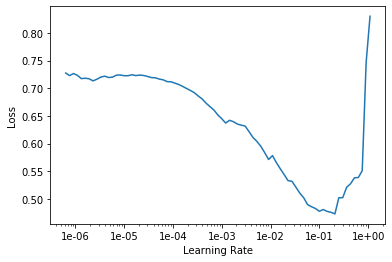

In [127]:
learn1 = tabular_learner(traindata, layers=[200,100], metrics=accuracy)
# 寻找合适的学习率
learn1.lr_find()
learn1.recorder.plot()

In [128]:
learn1.fit(1, 1e-2)

In [130]:
learn1.save('model1', return_path=True) # 训练时临时保存，用load加载

PosixPath('model/models/model1.pth')

In [131]:
learn1.export('model1.pkl') # 保存模型全部信息，用load_learner加载

## 测试

In [132]:
print(learn1.data.classes) # classes[0]是0，classes[1]是1

# preds是预测值，共classes个，哪个大取哪个class
# y是标注的class在classes中的索引，之前用0临时填充，故这里全是classes.index=0
preds1, y1 = learn1.get_preds(DatasetType.Test)
print(preds1); print(y1)

[0, 1]


tensor([[5.0806e-14, 1.0000e+00],
        [9.7803e-01, 2.1965e-02],
        [2.2050e-04, 9.9978e-01],
        ...,
        [9.9875e-01, 1.2482e-03],
        [9.9836e-01, 1.6443e-03],
        [9.9812e-01, 1.8796e-03]])
tensor([0, 0, 0,  ..., 0, 0, 0])


### 先取离散值 yc = {0,1} 看下分数

In [134]:
# yc = {0,1} 看下分数
tb1 = pd.DataFrame()
tb1['zjnsrsbh'] = testsetb['zjnsrsbh']

yc1 = np.argmax(preds1, 1).tolist()
print(yc1.count(0)) # testsetb六千条中多少0 （正常yc）
tb1['Probability'] = yc1
tb1.head()

3139


zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d            1
1  e2ce1429b399560a9ffd5d6edee21379            0
2  10978ccba846b58fc76742ab32b8c197            1
3  c862b7f4ad6a531f3552bed41c94138c            0
4  4628e5c776c5bede7d0208495e9d4ab7            1

In [135]:
get_score.post_user_id('022')
get_score.post_verify_data(tb1)

User-id:022
程序开始运行时间为：2019-12-22 04:42:09.891257
程序结束运行时间为：2019-12-22 04:42:09.900180
程序运行时间（去除打分耗时）为：0.008923
程序的准确率为：17.68255627
最终得分为：25.91430064


### 连续值 yc属于[0,1] 再看下分数

In [137]:
# 分类至1的概率 pr
# 要缩小列（第二维，dim=1，dim从0开始）
# 从start开始，保持length长
# pr是第二列 start=1
# 只留p1一列 length=1
pr = preds1.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
# print(pr)
# for x in pr:
#     if x>1 or x<0:
#         print(x, end=',')

tb1['Probability'] = pr
tb1.head()

zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d     1.000000
1  e2ce1429b399560a9ffd5d6edee21379     0.021965
2  10978ccba846b58fc76742ab32b8c197     0.999780
3  c862b7f4ad6a531f3552bed41c94138c     0.005570
4  4628e5c776c5bede7d0208495e9d4ab7     1.000000

In [138]:
get_score.post_user_id('022')
get_score.post_verify_data(tb1)

User-id:022
程序开始运行时间为：2019-12-22 04:42:22.162320
程序结束运行时间为：2019-12-22 04:42:22.168689
程序运行时间（去除打分耗时）为：0.006369
程序的准确率为：90.45194928
最终得分为：91.40675435


## model2 只用连续属性

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


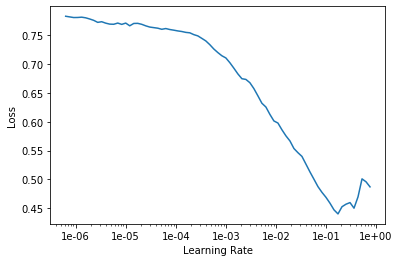

In [140]:
cat_names2 = []
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names2, cont_names1, test_df=testsetb)

learn2 = tabular_learner(traindata, layers=[200,100], metrics=accuracy)
# 寻找合适的学习率
learn2.lr_find()
learn2.recorder.plot()

In [141]:
learn2.fit(1, 0.05)

In [144]:
learn2.save('model2', return_path=True)

PosixPath('model/models/model2.pth')

In [146]:
learn2.export('model2.pkl')

preds2, y2 = learn2.get_preds(DatasetType.Test)

# # 分类yc{0,1} 的分数
tb2 = pd.DataFrame()
tb2['zjnsrsbh'] = testsetb['zjnsrsbh']

yc2 = np.argmax(preds2, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc2.count(0)}')
tb2['Probability'] = yc2
print(tb2.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb2)

# 概率yc[0,1]的分数
pr = preds2.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb2['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb2)

测试集B中预测多少0(正常)	3137
                           zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d            1
1  e2ce1429b399560a9ffd5d6edee21379            0
2  10978ccba846b58fc76742ab32b8c197            1
3  c862b7f4ad6a531f3552bed41c94138c            0
4  4628e5c776c5bede7d0208495e9d4ab7            1
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 04:46:21.306080
程序结束运行时间为：2019-12-22 04:46:21.310805
程序运行时间（去除打分耗时）为：0.004725
程序的准确率为：21.13646056
最终得分为：29.02281451
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 04:46:21.429280
程序结束运行时间为：2019-12-22 04:46:21.434653
程序运行时间（去除打分耗时）为：0.005373
程序的准确率为：83.80077958
最终得分为：85.42070162


## model3 部分cat部分cont

In [101]:
for name in ['hy', 'hydl', 'hyml', 'hyzl']:
    print(f'----------{name}--------------')
    print(trainset[name][:5])

----------hy--------------
0     会计、审计及税务服务
1          建筑装饰业
2      医疗用品及器材批发
3    其他未列明金属制品制造
4      其他非货币银行服务
Name: hy, dtype: object
----------hydl--------------
0         商务服务业
1    建筑装饰和其他建筑业
2           批发业
3         金属制品业
4        货币金融服务
Name: hydl, dtype: object
----------hyml--------------
0    租赁和商务服务业
1         建筑业
2      批发和零售业
3         制造业
4         金融业
Name: hyml, dtype: object
----------hyzl--------------
0        咨询与调查
1        建筑装饰业
2    医药及医疗器材批发
3     其他金属制品制造
4      非货币银行服务
Name: hyzl, dtype: object


In [12]:
# 报税人姓名bsrxm
# 法定代表人姓名fddbrxm,
# 行业hy, 行业中类hyzl,
# 纳税人名称nsrmc, 
cat_names3 = [
    'bsrxm',
    'fddbrxm',
    'hy', 'hyzl',
    'nsrmc'
]

# 从业人数 cyrs, 
# 注册资本zczb, 
# 开票数kps，开票比例 kpbl，
# 进项金额jxje，进项税额jxse，
# 开票金额kpje，开票税额kpse，
# 应纳税额ynse，入库金额rkse，欠税qs
cont_names3 = [
    'cyrs',
    'zczb'
]
for yn in range(3): # year num
    for sn in range(4): # seasom num
        prefix = str(2017+yn)+'q'+str(sn+1)
        for attr in [
            'kps', 'fphdsl', 'kpbl',
            'jxje', 'jxsl', 'jxse',
            'kpje', 'kpsl', 'kpse',
            'ynse', 'rkse',  'qs'
        ]:
            attr = prefix + attr
            cont_names3.append(attr)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


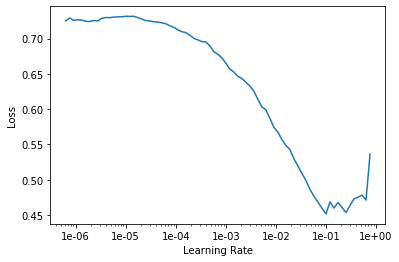

In [149]:
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names3, cont_names3, test_df=testsetb)

learn3 = tabular_learner(traindata, layers=[200,100], metrics=accuracy)
# 寻找合适的学习率
learn3.lr_find()
learn3.recorder.plot()

In [150]:
learn3.fit(1, 1e-2)

In [151]:
learn3.save('model3', return_path=True)
learn3.export('model3.pkl')

In [152]:
preds3, y3 = learn3.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb3 = pd.DataFrame()
tb3['zjnsrsbh'] = testsetb['zjnsrsbh']

yc3 = np.argmax(preds3, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc3.count(0)}')
tb3['Probability'] = yc3
print(tb3.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb3)

# 概率yc[0,1]的分数
pr = preds3.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb3['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb3)

测试集B中预测多少0(正常)	3171
                           zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d            1
1  e2ce1429b399560a9ffd5d6edee21379            0
2  10978ccba846b58fc76742ab32b8c197            1
3  c862b7f4ad6a531f3552bed41c94138c            0
4  4628e5c776c5bede7d0208495e9d4ab7            1
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 04:53:30.398475
程序结束运行时间为：2019-12-22 04:53:30.403317
程序运行时间（去除打分耗时）为：0.004842
程序的准确率为：0.4131814
最终得分为：10.37186326
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 04:53:30.522901
程序结束运行时间为：2019-12-22 04:53:30.529333
程序运行时间（去除打分耗时）为：0.006432
程序的准确率为：90.90110146
最终得分为：91.81099132


## model4 只用直接提供的属性，意味着基本无预处理，耗时最短

In [154]:
# 分类值categorical
cat_names4 = [
    'bsrxm', 'bsrxmmp',
    'fdbrxmp', 'fddbrxm',
    'hy', 'hydl', 'hyml', 'hyzl', 
    'nsrmc', 
    'zjnsrsbh'
]

# 连续值continous
cont_names4 = [
    'cyrs',
    'zczb',
]
for yn in range(3): # year num
    for sn in range(4): # seasom num
        prefix = str(2017+yn)+'q'+str(sn+1)
        for attr in [
            'kps', 'fphdsl',
            'jxje', 'jxsl',
            'kpje', 'kpsl', 'kpse',
            'rkse',
        ]:
            attr = prefix + attr
            cont_names4.append(attr)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


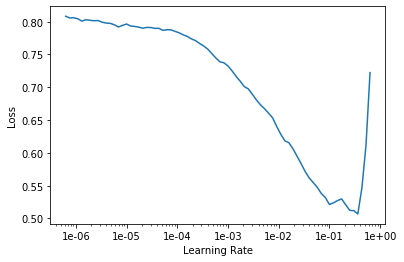

In [157]:
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names4, cont_names4, test_df=testsetb)

learn4 = tabular_learner(traindata, layers=[200,100], metrics=accuracy)
# 寻找合适的学习率
learn4.lr_find()
learn4.recorder.plot()

In [158]:
learn4.fit(1, 0.03)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


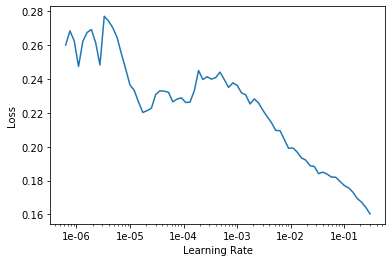

In [163]:
learn4.lr_find()
learn4.recorder.plot()

In [159]:
learn4.save('model4', return_path=True)
learn4.export('model4.pkl')

In [160]:
preds4, y4 = learn1.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb4 = pd.DataFrame()
tb4['zjnsrsbh'] = testsetb['zjnsrsbh']

yc4 = np.argmax(preds4, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc4.count(0)}')
tb4['Probability'] = yc4
print(tb4.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb4)

# 概率yc[0,1]的分数
pr = preds4.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb4['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb4)

测试集B中预测多少0(正常)	3767
                           zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d            1
1  e2ce1429b399560a9ffd5d6edee21379            0
2  10978ccba846b58fc76742ab32b8c197            0
3  c862b7f4ad6a531f3552bed41c94138c            0
4  4628e5c776c5bede7d0208495e9d4ab7            1
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 05:06:40.602134
程序结束运行时间为：2019-12-22 05:06:40.606864
程序运行时间（去除打分耗时）为：0.00473
程序的准确率为：0
最终得分为：0
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 05:06:40.726303
程序结束运行时间为：2019-12-22 05:06:40.732145
程序运行时间（去除打分耗时）为：0.005842
程序的准确率为：31.30259388
最终得分为：38.17233449


### 综上，model3（部分cat部分cont）得分最高（91.811），model4（只用直接属性）得分最低（38.172）这说明：

（1）仅直接属性是不够的

（2）属性间存在关联关系，要注意减少冗余。

四个model按耗时从低到高排序：4 < 3 = 2 < 1

## model5 增强模型

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


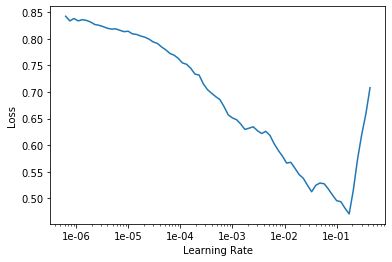

In [172]:
valid_idx = []
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names3, cont_names3, test_df=testsetb)

learn5 = tabular_learner(traindata, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)
learn5.model

# 寻找合适的学习率
learn5.lr_find()
learn5.recorder.plot()

In [173]:
learn5.fit_one_cycle(1, 1e-2, wd=0.2)

In [176]:
learn5.save('model5', return_path=True)
learn5.export('model5.pkl')

In [174]:
preds5, y5 = learn5.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb5 = pd.DataFrame()
tb5['zjnsrsbh'] = testsetb['zjnsrsbh']

yc5 = np.argmax(preds5, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc5.count(0)}')
tb1['Probability'] = yc5
print(tb5.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb1)

# 概率yc[0,1]的分数
pr = preds5.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb5['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb5)

测试集B中预测多少0(正常)	3146
                           zjnsrsbh
0  6a6c2ca338a3a48d33d701c7ef82986d
1  e2ce1429b399560a9ffd5d6edee21379
2  10978ccba846b58fc76742ab32b8c197
3  c862b7f4ad6a531f3552bed41c94138c
4  4628e5c776c5bede7d0208495e9d4ab7
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 06:21:25.454346
程序结束运行时间为：2019-12-22 06:21:25.459689
程序运行时间（去除打分耗时）为：0.005343
程序的准确率为：15.95564411
最终得分为：24.3600797
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 06:21:25.581578
程序结束运行时间为：2019-12-22 06:21:25.584785
程序运行时间（去除打分耗时）为：0.003207
程序的准确率为：91.03051793
最终得分为：91.92746614


## model6 以上是否存在过拟合

/opt/conda/lib/python3.7/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


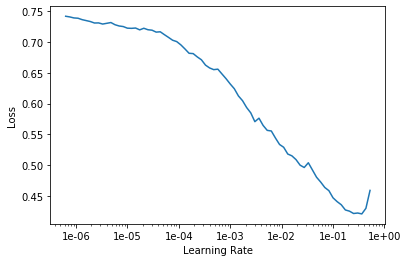

In [25]:
valid_idx = []
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names3, cont_names3, test_df=testsetb)

learn6 = tabular_learner(traindata, layers=[500,300], ps=[0.001,0.01], emb_drop=0.1, metrics=accuracy)
learn6.model

# 寻找合适的学习率
learn6.lr_find()
learn6.recorder.plot()

In [26]:
learn6.fit_one_cycle(1, 1e-2, wd=0.2)

In [180]:
learn6.save('model6', return_path=True)
learn6.export('model6.pkl')

In [181]:
preds6, y6 = learn6.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb6 = pd.DataFrame()
tb6['zjnsrsbh'] = testsetb['zjnsrsbh']

yc6 = np.argmax(preds6, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc6.count(0)}')
tb1['Probability'] = yc6
print(tb6.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb1)

# 概率yc[0,1]的分数
pr = preds6.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb6['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb6)

测试集B中预测多少0(正常)	3162
                           zjnsrsbh
0  6a6c2ca338a3a48d33d701c7ef82986d
1  e2ce1429b399560a9ffd5d6edee21379
2  10978ccba846b58fc76742ab32b8c197
3  c862b7f4ad6a531f3552bed41c94138c
4  4628e5c776c5bede7d0208495e9d4ab7
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 06:35:04.036180
程序结束运行时间为：2019-12-22 06:35:04.041160
程序运行时间（去除打分耗时）为：0.00498
程序的准确率为：6.74530373
最终得分为：16.07077336
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 06:35:04.161490
程序结束运行时间为：2019-12-22 06:35:04.170111
程序运行时间（去除打分耗时）为：0.008621
程序的准确率为：91.48339991
最终得分为：92.33505992


## model7 减少训练集的量

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


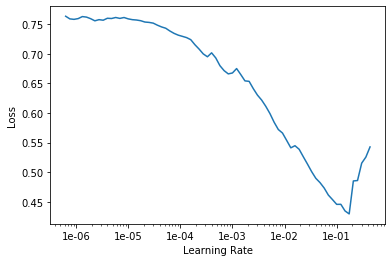

In [21]:
path = 'model' # 存放训练过程中产生的数据，如模型

n = len(trainset)
valid_idx = range(int(n*0.6), n) # 后40%作验证集
traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names3, cont_names3, test_df=testsetb)

learn7 = tabular_learner(traindata, layers=[500,300], ps=[0.001,0.01], emb_drop=0.1, metrics=accuracy)
learn7.model

# 寻找合适的学习率
learn7.lr_find()
learn7.recorder.plot()

In [22]:
learn7.fit_one_cycle(1, 1e-2, wd=0.2)

In [23]:
learn7.save('model7', return_path=True)
learn7.export('model7.pkl')

In [24]:
preds7, y7 = learn7.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb7 = pd.DataFrame()
tb7['zjnsrsbh'] = testsetb['zjnsrsbh']

yc7 = np.argmax(preds7, 1).tolist()
print(f'测试集B中预测多少0(正常)\t{yc7.count(0)}')
tb7['Probability'] = yc7
print(tb7.head())

print('------------分类yc{0,1} 的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb7)

# 概率yc[0,1]的分数
pr = preds7.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tb7['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb7)

测试集B中预测多少0(正常)	3153
                           zjnsrsbh  Probability
0  6a6c2ca338a3a48d33d701c7ef82986d            1
1  e2ce1429b399560a9ffd5d6edee21379            0
2  10978ccba846b58fc76742ab32b8c197            1
3  c862b7f4ad6a531f3552bed41c94138c            0
4  4628e5c776c5bede7d0208495e9d4ab7            1
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 11:02:04.026845
程序结束运行时间为：2019-12-22 11:02:04.030554
程序运行时间（去除打分耗时）为：0.003709
程序的准确率为：11.92612019
最终得分为：20.73350817
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 11:02:04.154548
程序结束运行时间为：2019-12-22 11:02:04.159074
程序运行时间（去除打分耗时）为：0.004526
程序的准确率为：89.83484344
最终得分为：90.85135909


### model5~7中，model6得分最高（92.335），

说明增强模型能提高一定的得分，如一定程度地增强层，添加drop机制。

model6 7 除训练集大小其余设置相同，6用全集训练，7用60%训练，6的得分更高，说明全集训练并没有过多。

## 一个尝试

In [31]:
preds6, y6 = learn6.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tb6 = pd.DataFrame()
tb6['zjnsrsbh'] = testsetb['zjnsrsbh']

# 概率yc[0,1]的分数
pr = preds6.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]

min_pr = min(pr)
print(f'min r\t{min_pr}')
pr = [x-min_pr for x in pr]

tb6['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score.post_user_id('022')
get_score.post_verify_data(tb6)

min r	0.00014594814274460077
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 11:21:53.514042
程序结束运行时间为：2019-12-22 11:21:53.518580
程序运行时间（去除打分耗时）为：0.004538
程序的准确率为：89.80452581
最终得分为：90.82407323


## A榜

用model3 打下A榜。

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


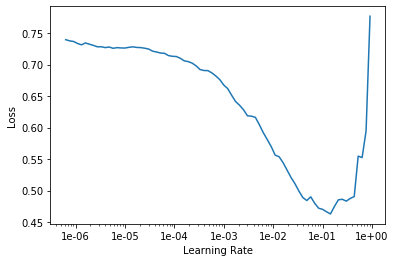

In [161]:
from ustciscrLab_A import get_score as get_score_A

traindata = TabularDataBunch.from_df(path, trainset, dep_var, valid_idx, procs, cat_names3, cont_names3, test_df=testseta)

learnA = tabular_learner(traindata, layers=[200,100], metrics=accuracy)
# 寻找合适的学习率
learnA.lr_find()
learnA.recorder.plot()

In [162]:
learnA.fit(1, 1e-2)

In [165]:
learnA.save('modelA', return_path=True)
learnA.export('modelA.pkl')

In [166]:
predsA, yA = learnA.get_preds(DatasetType.Test)

# 分类yc{0,1} 的分数
tbA = pd.DataFrame()
tbA['zjnsrsbh'] = testseta['zjnsrsbh']

ycA = np.argmax(predsA, 1).tolist()
print(f'测试集A中预测多少0(正常)\t{ycA.count(0)}')
tbA['Probability'] = ycA
print(tbA.head())

print('------------分类yc{0,1} 的分数---------------')
get_score_A.post_user_id('022')
get_score_A.post_verify_data(tbA)

# 概率yc[0,1]的分数
pr = predsA.narrow(dim=1, start=1, length=1).tolist()
pr = [x[0] for x in pr]
tbA['Probability'] = pr
print('------------概率yc[0,1]的分数---------------')
get_score_A.post_user_id('022')
get_score_A.post_verify_data(tbA)

测试集A中预测多少0(正常)	3133
                           zjnsrsbh  Probability
0  d4ef16de060fcf961683053abe9ed6fc            0
1  a6478edf406d98f19c6838981794a18a            1
2  9affb0dff8d024cbc8fb245947341264            0
3  0f446fcfcd8b55c78c858923d7dd83e8            1
4  1694cbf4342a6c58483c43c602844dcb            1
------------分类yc{0,1} 的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 05:20:08.140099
程序结束运行时间为：2019-12-22 05:20:08.144994
程序运行时间（去除打分耗时）为：0.004895
程序的准确率为：6.16945756
最终得分为：15.55251181
------------概率yc[0,1]的分数---------------
User-id:022
程序开始运行时间为：2019-12-22 05:20:08.276925
程序结束运行时间为：2019-12-22 05:20:08.281942
程序运行时间（去除打分耗时）为：0.005017
程序的准确率为：91.61382176
最终得分为：92.45243958
